<div style="background-color:Skyblue;padding: 15px"> CA2 - Capstone Project - Dublin Rent Prediction </div>

<div style="background-color:gold;padding: 5px"> CA2 - Pre-Processing of Data</div>

In [1]:
# Load the Libraries for data manipulation
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore') # We can suppress the warnings

In [2]:
# Load the csv file
df = pd.read_csv('RIQ02.Dublin.csv')
df.head()

,STATISTIC Label,Quarter,Number of Bedrooms,Property Type,Location,UNIT,VALUE
0,RTB Average Monthly Rent Report,2020Q4,One bed,Semi detached house,Dublin,Euro,1171.91
1,RTB Average Monthly Rent Report,2020Q4,One bed,Terrace house,Dublin,Euro,1267.63
2,RTB Average Monthly Rent Report,2020Q4,One bed,Apartment,Dublin,Euro,1447.47
3,RTB Average Monthly Rent Report,2020Q4,Two bed,Semi detached house,Dublin,Euro,1691.12
4,RTB Average Monthly Rent Report,2020Q4,Two bed,Terrace house,Dublin,Euro,1678.96


In [3]:
# Check the Row&Column count. Display the column type
display(df.shape)
display(df.info())

(126, 7)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   STATISTIC Label     126 non-null    object 
 1   Quarter             126 non-null    object 
 2   Number of Bedrooms  126 non-null    object 
 3   Property Type       126 non-null    object 
 4   Location            126 non-null    object 
 5   UNIT                126 non-null    object 
 6   VALUE               126 non-null    float64
dtypes: float64(1), object(6)
memory usage: 7.0+ KB


None

In [4]:
# Display unique values in each column and their count
for col in df.select_dtypes(object):
    unique_value = df[col].value_counts()
    print(f"Unique Number of value in Column '{col}' is '{df[col].nunique()}':")
    print("----------------------")
    print(unique_value.to_string())
    print("\n")

Unique Number of value in Column 'STATISTIC Label' is '1':
----------------------
STATISTIC Label
RTB Average Monthly Rent Report    126


Unique Number of value in Column 'Quarter' is '14':
----------------------
Quarter
2020Q4    9
2021Q1    9
2021Q2    9
2021Q3    9
2021Q4    9
2022Q1    9
2022Q2    9
2022Q3    9
2022Q4    9
2023Q1    9
2023Q2    9
2023Q3    9
2023Q4    9
2024Q1    9


Unique Number of value in Column 'Number of Bedrooms' is '3':
----------------------
Number of Bedrooms
One bed      42
Two bed      42
Three bed    42


Unique Number of value in Column 'Property Type' is '3':
----------------------
Property Type
Semi detached house    42
Terrace house          42
Apartment              42


Unique Number of value in Column 'Location' is '1':
----------------------
Location
Dublin    126


Unique Number of value in Column 'UNIT' is '1':
----------------------
UNIT
Euro    126




In [5]:
# Drop the column 'STATISTIC Label', 'Location' 'UNIT'
if 'STATISTIC Label' in df.columns:
    df = df.drop('STATISTIC Label', axis=1)
    
if 'Location' in df.columns:
    df = df.drop('Location', axis=1)

if 'UNIT' in df.columns:
    df = df.drop('UNIT', axis=1)

df.head()

,Quarter,Number of Bedrooms,Property Type,VALUE
0,2020Q4,One bed,Semi detached house,1171.91
1,2020Q4,One bed,Terrace house,1267.63
2,2020Q4,One bed,Apartment,1447.47
3,2020Q4,Two bed,Semi detached house,1691.12
4,2020Q4,Two bed,Terrace house,1678.96


In [6]:
# Replace value 'Number of Bedrooms' to 1, 2, 3
df['Number of Bedrooms'] = df['Number of Bedrooms'].replace('One bed',1)
df['Number of Bedrooms'] = df['Number of Bedrooms'].replace('Two bed',2)
df['Number of Bedrooms'] = df['Number of Bedrooms'].replace('Three bed',3)

# Replace value 'Property Type' to 0, 1, 2. Apartment-> 0, Terrace house ->1, Semi detached house ->2
df['Property Type'] = df['Property Type'].replace('Apartment',0)
df['Property Type'] = df['Property Type'].replace('Terrace house',1)
df['Property Type'] = df['Property Type'].replace('Semi detached house',2)

df.head()

,Quarter,Number of Bedrooms,Property Type,VALUE
0,2020Q4,1,2,1171.91
1,2020Q4,1,1,1267.63
2,2020Q4,1,0,1447.47
3,2020Q4,2,2,1691.12
4,2020Q4,2,1,1678.96


In [7]:
# checking for duplicate rows
print("Total number of duplicate rows: ", df.duplicated().sum())

Total number of duplicate rows:  0


<div style="background-color:gold;padding: 5px"> CA2 - Correlation Matrix</div>

,Quarter,Number of Bedrooms,Property Type,VALUE
0,2020Q4,1,2,1171.91
1,2020Q4,1,1,1267.63
2,2020Q4,1,0,1447.47
3,2020Q4,2,2,1691.12
4,2020Q4,2,1,1678.96


,Quarter,Number of Bedrooms,Property Type,VALUE
0,202004,1,2,1171.91
1,202004,1,1,1267.63
2,202004,1,0,1447.47
3,202004,2,2,1691.12
4,202004,2,1,1678.96


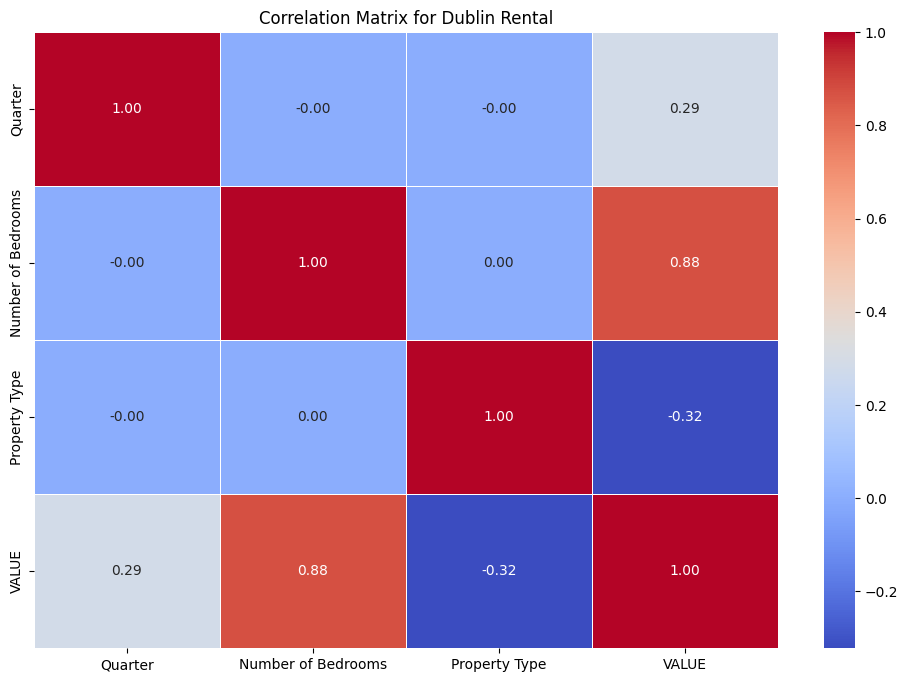

In [8]:
# # Correlation heatmap to check the features that are of high importance to dependent variable
import seaborn as sns
import matplotlib.pyplot as plt

df_corr = df.copy()
df_corr['Quarter'] = df_corr['Quarter'].str.replace('Q', '0')
corr_matrix = df_corr.corr()

display(df.head())
display(df_corr.head())

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix for Dublin Rental")
plt.show()

<div style="background-color:gold;padding: 5px"> CA2 - Plot for Actual Data</div>

In [9]:
# Convert 'Quarter' to pandas PeriodIndex
df['Quarter'] = pd.PeriodIndex(df['Quarter'], freq='Q')

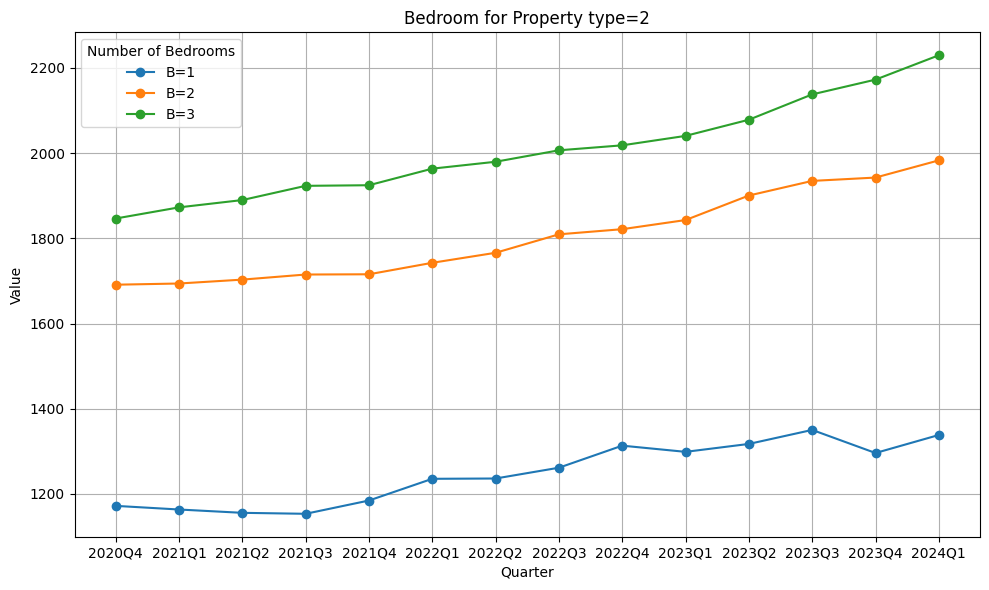

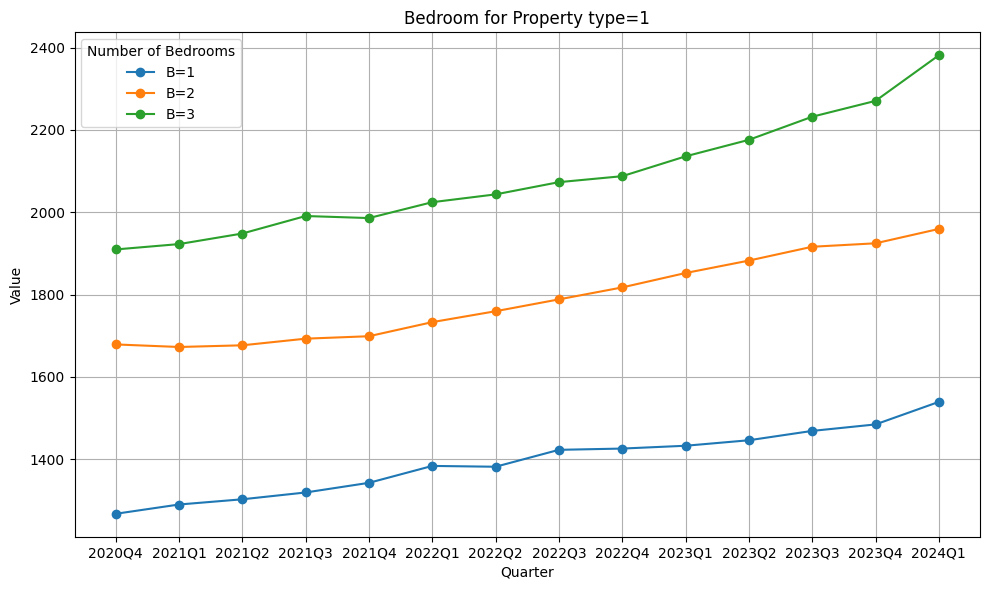

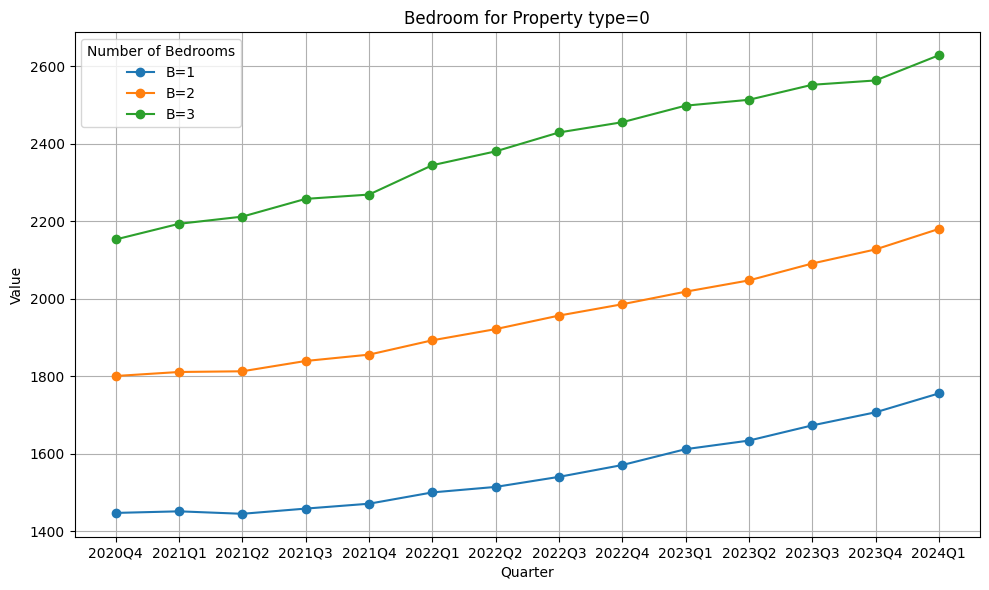

In [10]:
# Display plot for each property type

import seaborn as sns
import matplotlib.pyplot as plt

for type in df['Property Type'].unique():
    df_type = df[df['Property Type'] == type]
    

    plt.figure(figsize=(10, 6))
    for bed in df['Number of Bedrooms'].unique():
        subset = df_type[df_type['Number of Bedrooms'] == bed]
        plt.plot(subset['Quarter'].astype(str), subset['VALUE'], marker='o', label=f'B={bed}') 

# Add a title and labels
    plt.title(f'Bedroom for Property type={type}')
    plt.xlabel('Quarter')
    plt.ylabel('Value')
    plt.legend(title='Number of Bedrooms')
    plt.grid(True)
# plt.grid(axis='y', linestyle='--', alpha=0.7)
# plt.xticks(rotation=45)
    plt.tight_layout()

# Show the plot
    plt.show()
    

<div style="background-color:gold;padding: 5px"> CA2 - ML Modelling Using ARIMA</div>

In [11]:
# Convert column 'Quarter' to a datetime index

df['Quarter'] = pd.PeriodIndex(df['Quarter'], freq='Q').to_timestamp(how='start')
df.set_index('Quarter', inplace=True)

C:\Users\I075355\myenv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


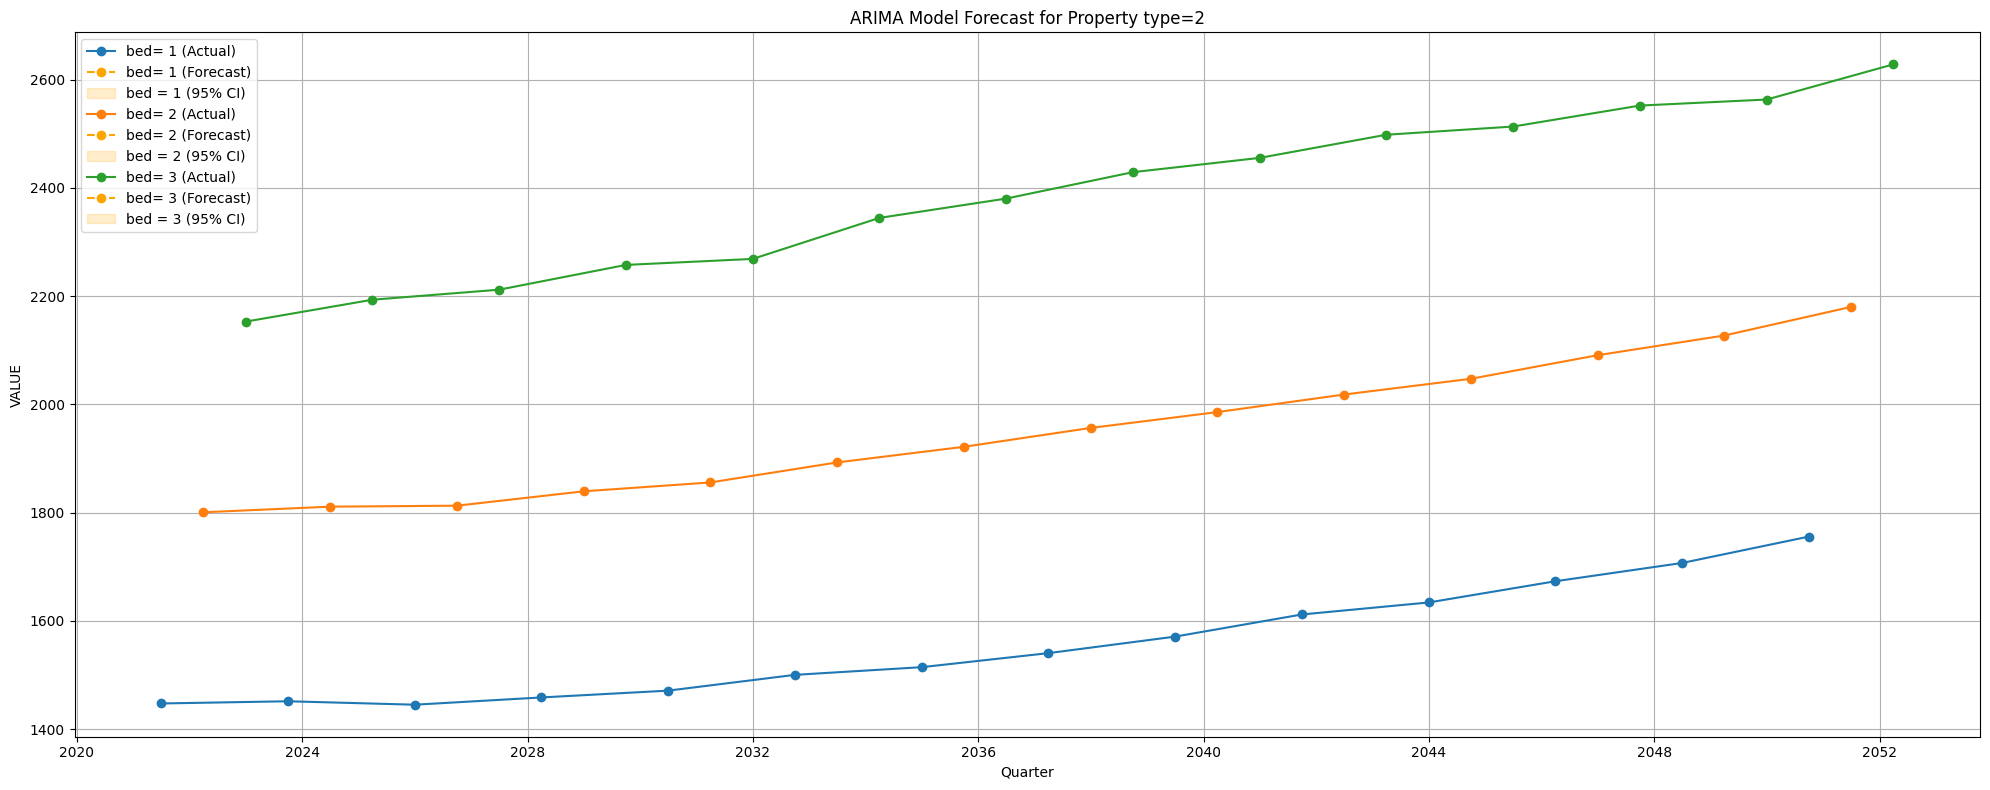

C:\Users\I075355\myenv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


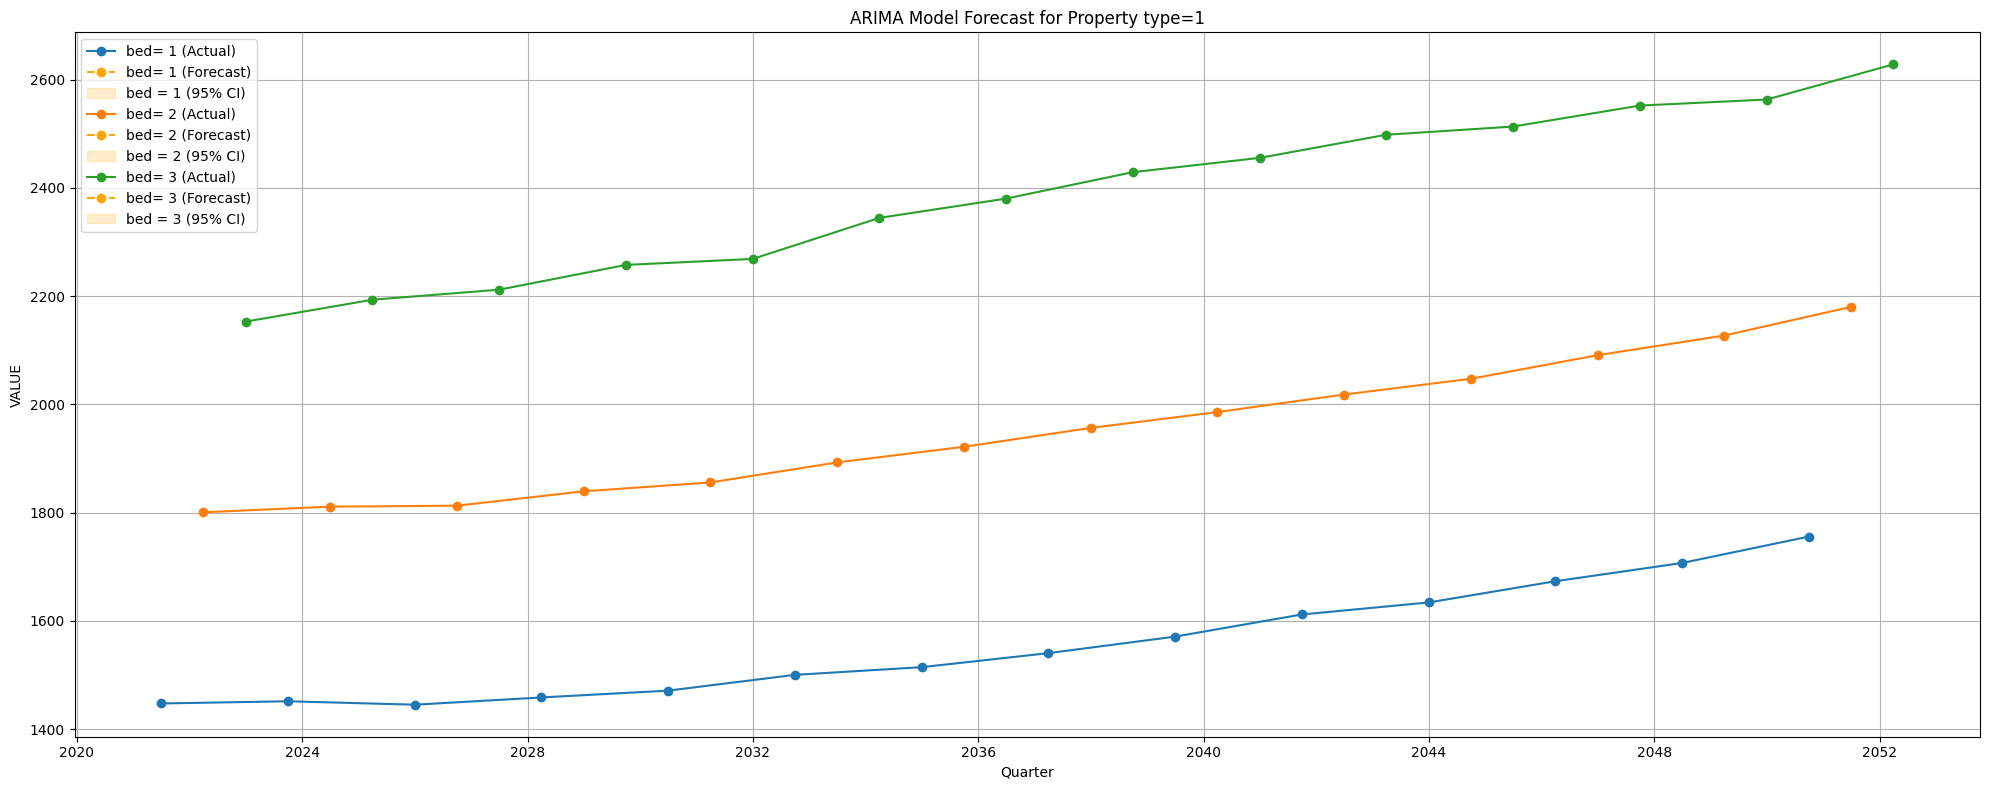

C:\Users\I075355\myenv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


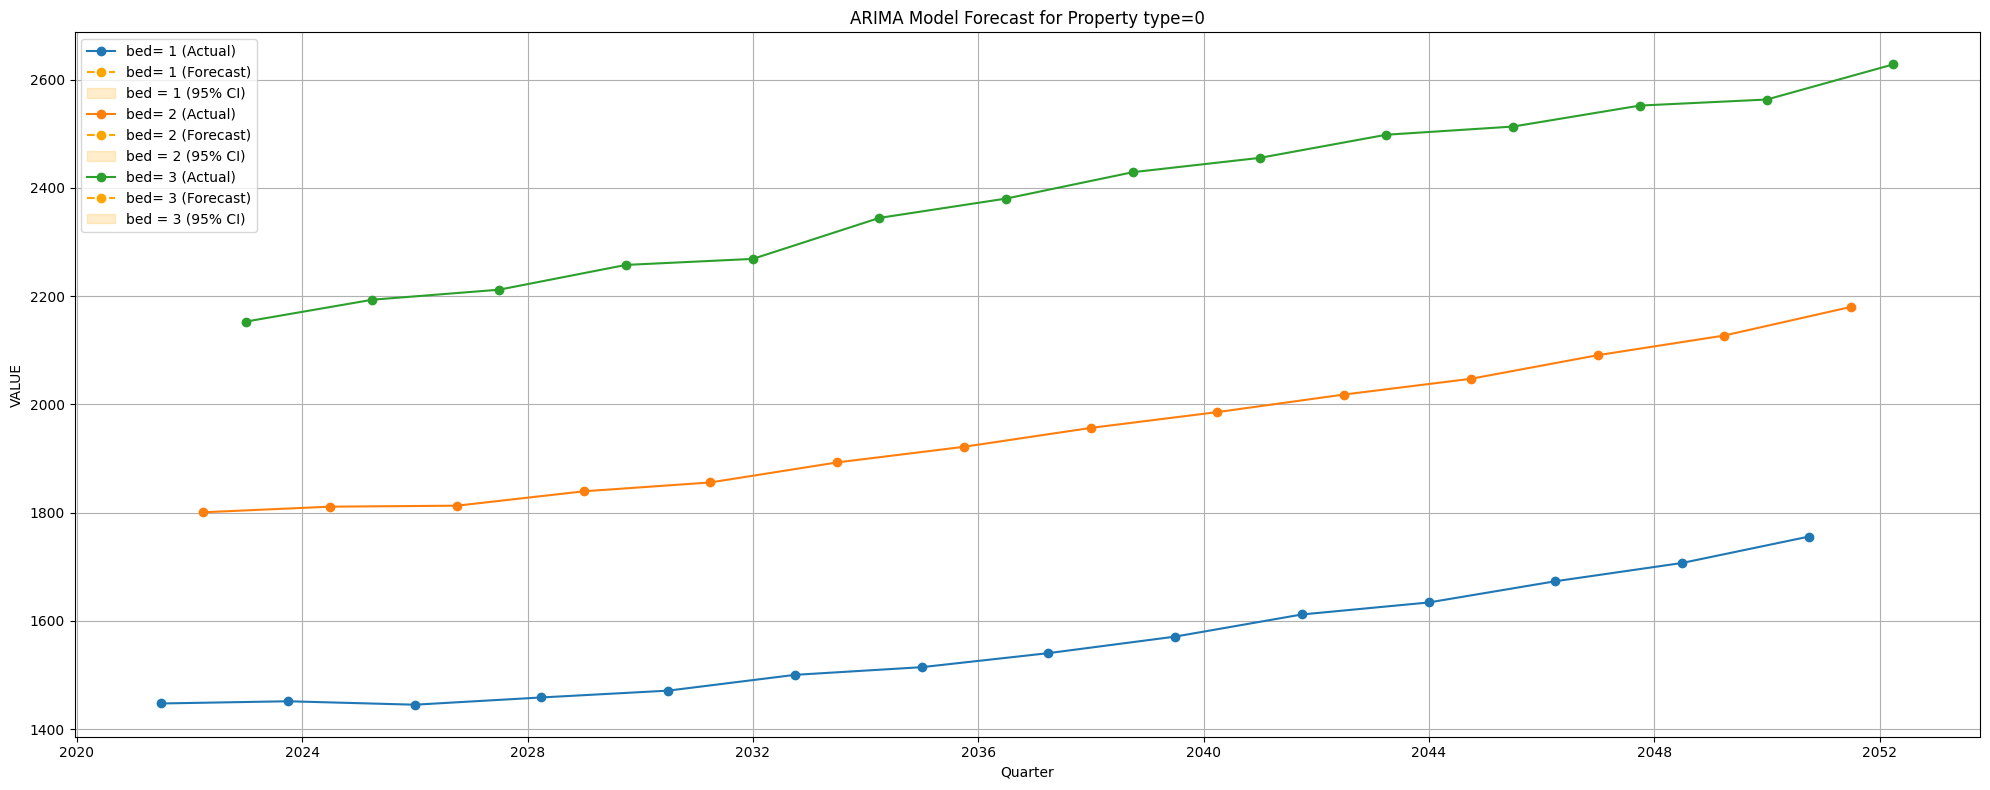

In [39]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.dates as mdates
import matplotlib.pyplot as plt

# Step 1.1: Explicitly set frequency (to avoid warnings)
df.index = pd.date_range(start=df.index[0], periods=len(df), freq='Q')

# get unique property type values
unique_type = df['Property Type'].unique()

for type_value in unique_type:
    type_subset = df[df['Property Type'] == type] # filter data based on property type

    # build plot for each property type value
    plt.figure(figsize=(20, 8))
    plt.title(f'ARIMA Model Forecast for Property type={type_value}')
    plt.xlabel('Quarter')
    plt.ylabel('VALUE')

    # get unique bed values
    unique_bed = type_subset['Number of Bedrooms'].unique()

    # Loop through each unique bed value
    for bed_value in unique_bed:
        bed_subset = type_subset[type_subset['Number of Bedrooms'] == bed_value] #filter data based on bed value in each property type

        # Step 2: Prepare the target series
        target_series = bed_subset['VALUE']

        # Step 3: Fit ARIMA model
 
        model = ARIMA(target_series, order=(1, 1, 1))
        model_fit = model.fit()

        # Step 4: Forecast future values
        forecast_steps = 4  # Forecast next 4 quarters
        forecast = model_fit.get_forecast(steps=forecast_steps)
        forecast_values = forecast.predicted_mean
        forecast_conf_int = forecast.conf_int()

        # Step 4.1: Generate future quarterly timestamps
        last_timepoint = target_series.index[-1]
        forecast_index = pd.date_range(start=last_timepoint + pd.offsets.QuarterBegin(1), periods=forecast_steps, freq='Q')

        # Step 5: Visualize the results

        # Plot actual data
        plt.plot(target_series.index, target_series, label=f'bed= {bed_value} (Actual)', marker='o')

        # Create a new DataFrame to combine actual and forecasted data for plotting
        forecast_df = pd.DataFrame({
            'Target': forecast_values,
            'Lower CI': forecast_conf_int.iloc[:, 0],
            'Upper CI': forecast_conf_int.iloc[:, 1]
        }, index=forecast_index)
        
        # Plot forecast
        # plt.plot(forecast_index, forecast_values, linestyle = '--', label=f'bed= {bed_value} (Forecast)', marker='o', color='orange')
        plt.plot(forecast_df.index, forecast_df['Target'], linestyle = '--', label=f'bed= {bed_value} (Forecast)', marker='o', color='orange')
        
        # Plot confidence intervals
        plt.fill_between(
            forecast_index,
            # forecast_conf_int.iloc[:, 0],
            # forecast_conf_int.iloc[:, 1],
            forecast_df['Lower CI'],
            forecast_df['Upper CI'],
            color='orange',
            alpha=0.2,
            label=f'bed = {bed_value} (95% CI)'
        )

# Format the x-axis to show quarterly timepoints
    #plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))  # Quarterly intervals
    # plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-Q%q'))


    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

